In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [7]:
# create engine to hawaii.sqlite
hawaii_database_path = "./Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{hawaii_database_path}")
conn = engine.connect()

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.
most_recent = session.query(func.max(Measurement.date)).first()
most_recent






('2017-08-23')

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017,8,23)-dt.timedelta(days = 365)
last_year



datetime.date(2016, 8, 23)

In [27]:
# Perform a query to retrieve the data and precipitation scores
last_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).all()

last_df = pd.DataFrame(last_data, columns = ["Date", "Precipitation"])


# Save the query results as a Pandas DataFrame and set the index to the date column
last_df.sort_values("Date",inplace = True)

# Sort the dataframe by date
last_df




,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


Text(0, 0.5, 'Precipitation')

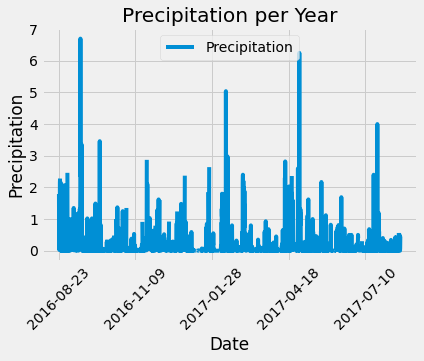

In [30]:
# Use Pandas Plotting with Matplotlib to plot the data
last_df.plot(x = "Date", y = "Precipitation", rot = 45)
plt.title("Precipitation per Year")
plt.ylabel("Precipitation")

In [31]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9)]

In [36]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()




[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [38]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

In [40]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Data = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date >= last_year).all()
hist_df = pd.DataFrame(Data, columns = ["Temperature"])
hist_df

,Temperature
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


Text(0.5, 1.0, 'Last Year Temperature for USC00519281')

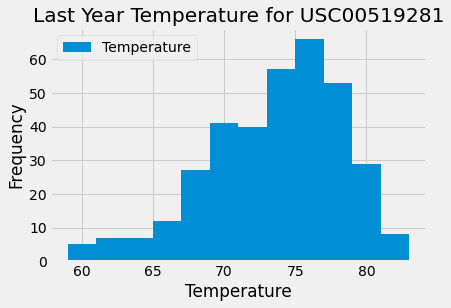

In [43]:
hist_df.plot.hist(bins = 12)
plt.xlabel("Temperature")
plt.title("Last Year Temperature for USC00519281")

# Close session

In [44]:
# Close Session
session.close()